# Hypothesis testing: 1-Sample t-test

In this notebook we'll show you how to calculate a one-sample t-test. We'll do this twice. 
* First, we'll go through the approach manually so you can see the maths and reasoning behind what we're doing - this should help with comprehension and help you to design better experiments.
* Second, we'll go through the shorter coding way, where a computer will do all the work for you, but won't tell you why, it's a black box of numbers.

# I. The manual approach

## 1.&nbsp; Define the initial question for which the truth is not known.

The average weight of squirrels in general is 1 kg. We take a sample of squirrels from our local population and weigh each of them. Given the average weight of the sample from our local population of squirrels:

Can we assume that the average weight of the squirrels in our local population is 1kg?

## 2.&nbsp; State the Null Hypothesis and the Alternative Hypothesis.

We need to state the Null and Alternative Hypothesis before we look at any data to prevent data snooping.

Null Hypothesis ($H_0$): mean(local population) **=** 1

Alternative Hypothesis ($H_A$): mean(local population) **!=** 1

We are more afraid of squirrels starving, but it is also possible that they are overweight! So we want to check for both starving and overweight squirrels, and therefore decided to run a two-tailed test. 

If we wanted to check only for being underweight, as it doesn't matter if they are overweight, we'd perform a left-tailed t-test (one-tailed t-test). Similarly, if we only cared about overweight squirrels, we would perform a right-tailed t-test (also a one-tailed t-test).

image.png

Notice the area shaded in darker blue. Its size corresponds to the level of alpha. The values in this area are considered to be very unlikely and will therefore lead to a rejection of the Null Hypothesis. Therefore, the values on the x-axis that belong to the area in darker blue are called the **critical region**.

The values that separate the critical region from the region in lighter blue, are called **critical values**.

There is a perfect relationship between alpha, the critical region(s) and the critical value(s) in the sense that if you change one, the other ones will always change, too.

## 3.&nbsp; Select an appropriate significance level alpha ($\alpha$).

We need to state the significance level before we look at any data to prevent data snooping.

Alpha denotes the probability of rejecting the Null Hypothesis given that it's true. This can happen when our sample has relatively extreme values, which doesn't often happen - particularly in a well designed experiment. In such extreme cases, we would conclude that the Null Hypothesis would be unlikely (not impossible) and reject it.

**Commonly used values for alpha are 0.1, 0.05 and 0.01.**

Since we want to be very certain about our result and not reject the Null Hypothesis when it should not be rejected, we choose a small alpha.

In [62]:
alpha = 0.01

## 4.&nbsp; Consider the statistical assumptions about the set of data.

Statology is a great website to find out more and guide you on what assumptions should be made. [Here's their page on the one-sample t-test](https://www.statology.org/one-sample-t-test/).

For the results of a 1-sample t-test to be valid, the following assumptions should be met:

1. The variable under study should be numerical.
2. The observations in the sample should be independent.
3. The variable under study should be approximately normally distributed.
4. The variable under study should have no outliers.

### 4.1&nbsp; The variable under study should be numerical.

In [63]:
import pandas as pd

In [64]:
# Here's the weights of all the squirrels in our sample:
squirrels = pd.Series([1.3, 0.47, 1.5, 1.66, 2.43, 1.29, 0.94, 1.06, 1.03, 0.76, 0.6, 0.76, 0.32, 2.2, 1.24, 1.8, 1.66, 0.51, 
                       0.72, 1.62, 0.7, 0.76, 0.9, 0.93, 0.98, 0.42, 0.59, 0.12, 0.95, 0.55, 0.16, 1.25, 0.42, 0.64, 0.66, 
                       1.04, 0.49,0.41, 0.4, 0.81, 0.71, 0.04, 0.6, 2.44, 1.61, 0.13, 2.08, 0.7, 0.61, 0.58, 0.77, 0.67, 1.16, 
                       0.31, 0.3, 0.66, 0.03, 0.54, 0.63, 1.03, 0.73, 2.02])

In [65]:
# Calculate the sample mean:
sample_mean = squirrels.mean()
sample_mean

0.8935483870967743

The single weights are all floats, as is the average weight.

Condition fulfilled.

### 4.2&nbsp; The observations in the sample should be independent.

This needs to be ensured while collecting the data. At this point, we will assume that the squirrels were caught randomly, and that thus, their weights are independent.

Condition fulfilled.

### 4.3&nbsp; The variable under study should be approximately normally distributed.

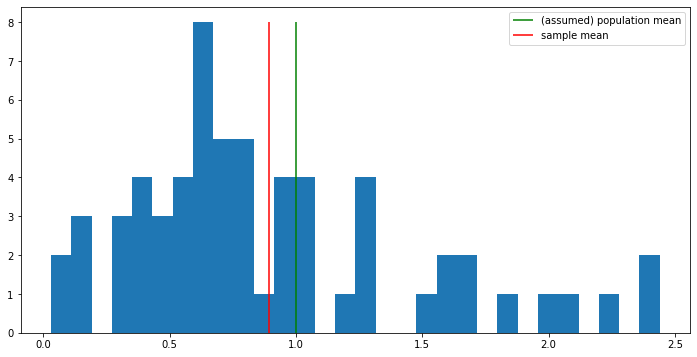

In [66]:
#@title Distribution of the observations in the sample

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
# Plot a histogram of the squirrels' weights.
yp, xp, _ = plt.hist(squirrels, bins=30)
# Add a vertical line for the population mean.
plt.vlines(1, ymin=0, ymax=max(yp), color="green", label="(assumed) population mean")
# Add a vertical line for the sample mean.
plt.vlines(sample_mean, ymin=0, ymax=max(yp), color="red", label="sample mean")
plt.legend()
plt.show()

The weights are approximately normally distributed.

Condition fulfilled.

### 4.4&nbsp; The variable under study should have no outliers.

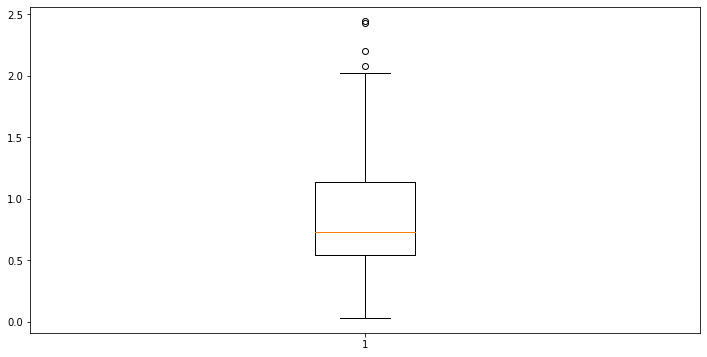

In [67]:
plt.figure(figsize=(12,6))
# Plot a boxplot of the squirrels' weights.
plt.boxplot(squirrels);

This condition is useful to ensure that the mean does not get shifted to either side by a small number of extreme values. In such a case, the mean would only give a distorted image of the dataset's center, and this would impact the meaningfulness of the entire test.

In our scenario though, and in combination with the histogram above, we can see that the observations plotted as outliers (with the default setting of the whiskers up until 1.5 times the standard deviation) are not far enough from the other observations to constitute a major risk of falsifying the mean. It is thus reasonable to conclude that the squirrels with weights above 2 kg are rather "fat tails of the distribution" that can be taken into account.

Condition fulfilled.

## 5.&nbsp; Decide on the appropriate test to use and the associated test statistic.

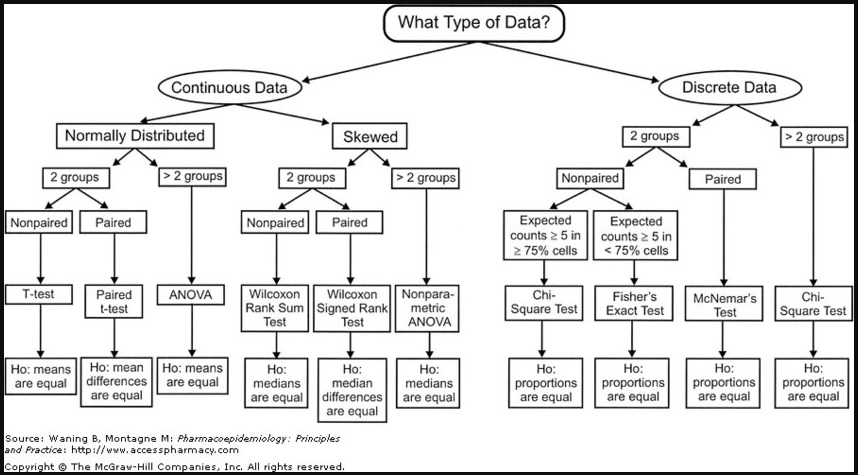

Comparing the mean of a sample with a predefined value is done using a **1-sample t-test**.

The associated test statistic is the t-score: 
$t = \frac{\bar{x} – μ} {\frac{s}{\sqrt{n}}}$

where

$\bar{x}$ = sample mean

μ = predefined value

s = sample standard deviation

n = sample size

## 6.&nbsp; Derive the distribution of the test statistic under the Null Hypothesis from the assumptions.

This section is purely theoretical. It is not often you will need to use your python skills to plot and compare t- and z-distributions. It's here purely to help deepen your understanding of what is happening "behind the scenes".

The t-score follows a **student's t-distribution with n-1 degrees of freedom**.
> **Fun fact:** The guy who published it first did so under the name "student". He actually worked for a brewery and discovered it while trying to come up with a way to improve QM there. Since the brewery only allowed him to publish his findings anonymously, he just called himself a "student", hence why you'll sometimes see it called the student's t-test. [Here's the story in more detail.](https://www.physoc.org/magazine-articles/the-strange-origins-of-the-students-t-test/)

In [68]:
# The sample size is commonly denoted as n.
n = len(squirrels)
n

62

In [69]:
# The degrees of freedom can be derived from the sample size.
degrees_of_freedom = n - 1
degrees_of_freedom

61

Intuition behind **degrees of freedom**:

In our sample, we have 62 observations. The only metric we really need for the test though, is the sample mean. This exact same sample mean can also be obtained from other samples with totally different observations.

Now the question is: how many observations are free to vary with regards to their value, while at the same time keeping the sample mean at this very same value?

The answer is: all but one. 61 observations could have any random value. It would always be possible to set the 62nd value such that the average of all 62 would be equal to the sample mean of our current observation.

Therefore, the degrees of freedom in our case is 61, because 61 observations are free to vary. We deduct 1 from the sample size because we need 1 metric for the test, and thus, 1 value is predetermined (as opposed to free) in its value once that the other 61 observations had the freedom to "choose" their values.

Let's plot a few t-distributions with different degrees of freedom.

In [70]:
import numpy as np
from scipy.stats import t

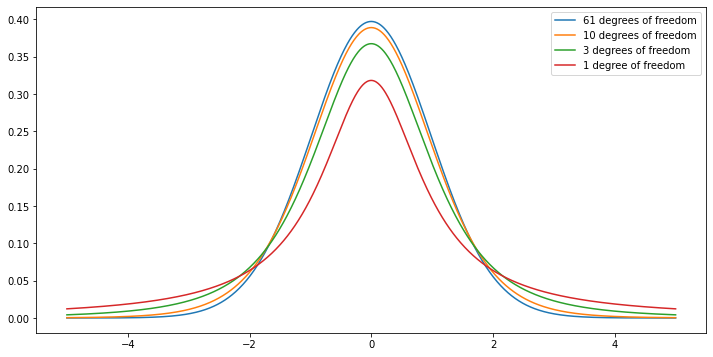

In [71]:
#@title t-distributions with different degrees of freedom
plt.figure(figsize=(12,6))
# Create a linear space from -5 to 5 with 1000 intervals for our x-axis.
xt = np.linspace(-5,5,1000)
# Plot t-distributions with different degrees of freedom.
plt.plot(xt, t.pdf(xt,61), label="61 degrees of freedom")
plt.plot(xt, t.pdf(xt,10), label="10 degrees of freedom")
plt.plot(xt, t.pdf(xt,3), label="3 degrees of freedom")
plt.plot(xt, t.pdf(xt,1), label="1 degree of freedom")
plt.legend()
plt.show()

The shape of the t-distributions looks familiar!

Is this not what a normal distribution looks like?

Let's compare them.

In [72]:
from scipy.stats import norm

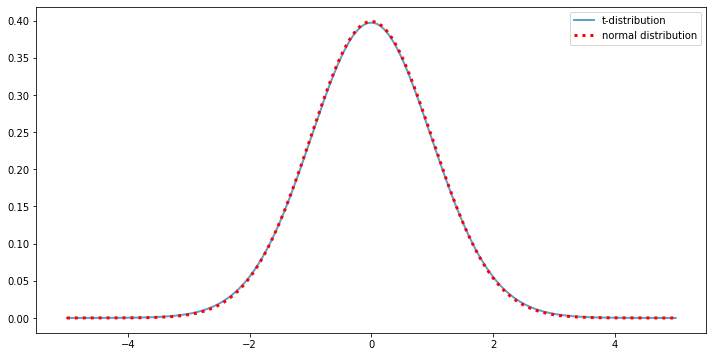

In [73]:
#@title Normal vs t-distribution
# Plot the probability density function of a t-distribution with 61 degrees of freedom.
# Compare it to a normal distribution.
plt.figure(figsize=(12,6))
xt = np.linspace(-5,5,1000)
# Plot a t-distribution with the degrees of freedom from our sample.
plt.plot(xt, t.pdf(xt,degrees_of_freedom), lw=2, alpha=0.7, label="t-distribution")
# Plot a normal distribution.
plt.plot(xt, norm.pdf(xt, 0, 1), lw=3, color="red", linestyle="dotted", label="normal distribution")
plt.legend()
plt.show()

## 7.&nbsp; Compute the test statistic using the data set.

Remember that $t = \frac{\bar{x} – μ} {\frac{s}{\sqrt{n}}}$:

In [74]:
# x_bar = sample mean
x_bar = squirrels.mean()
x_bar

0.8935483870967743

In [75]:
# μ is the value from the zoological registry, i.e. 1kg
mu = 1

In [76]:
# s = sample standard deviation
s = np.std(squirrels, ddof=1)
s

0.5744993451870131

We need to specify the delta degrees of freedom (ddof) as 1 in order to calculate the sample standard deviation (ddof = sample size - degrees of freedom).

By default, ddof = 0, which would give the population standard deviation.

Reminder:

Population standard deviation $\sigma = \sqrt{\frac{\sum(x_i - \mu)^2}{N}}$

Sample standard deviation $ s = \sqrt{\frac{\sum(x_i - \bar{x})^2}{n-1}}$

In [77]:
# Alternatively: use pandas to get the standard deviation.
# Note that by default, pandas calculates the sample standard deviation and uses ddof=1.
s_pandas = squirrels.std()
s_pandas

0.5744993451870131

In [78]:
# n = sample size
n

62

In [79]:
# Calculate the t-score with the values from above.
t_score = (x_bar-mu)/(s/np.sqrt(n))
t_score

-1.459010954883512

Let's see where the t-score is positioned relative to the t-distribution. 

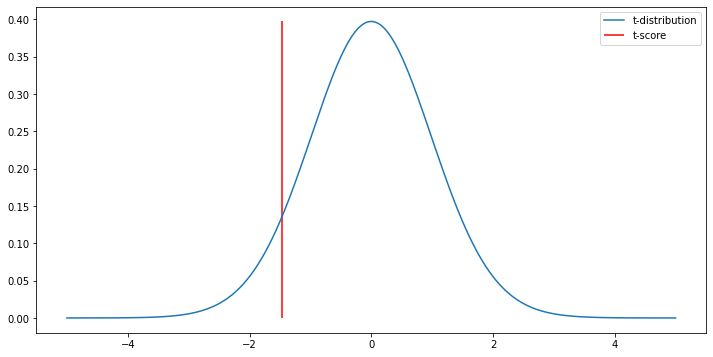

In [80]:
#@title t-distribution and t-score
plt.figure(figsize=(12,6))
# Plot a t-distribution with the degrees of freedom from our sample.
plt.plot(xt, t.pdf(xt,degrees_of_freedom), label="t-distribution")
# Add a vertical line for the t-score.
plt.vlines(t_score, ymin=0, ymax=max(t.pdf(xt,degrees_of_freedom)), color="red", label="t-score")
plt.legend()
plt.show()

## 8.&nbsp; Derive the critical region associated with the level of alpha.

Not too long ago, people used large tables to look up the critical values associated with a certain level of alpha, such as the one for the t-statistic below from [here](https://www.statology.org/here-is-how-to-find-the-p-value-from-the-t-distribution-table/).

In the columns at the top, you need to select the level of alpha (make sure to look at the appropriate type of test, one-tailed or two-tailed).

In our case, alpha is 0.01, and we choose to perform a two-tailed test.

Then you select the degrees of freedom of the test statistic's distribution in the first row. For any distribution with a different degree of freedom than the ones listed, the critical value will only be an approximation.

In our case, the degrees of freedom is 61. As an approximation, we get the value for a distribution with 60 degrees of freedom from the table - knowing that the actual value will be a tiny little bit smaller than the value from the table.



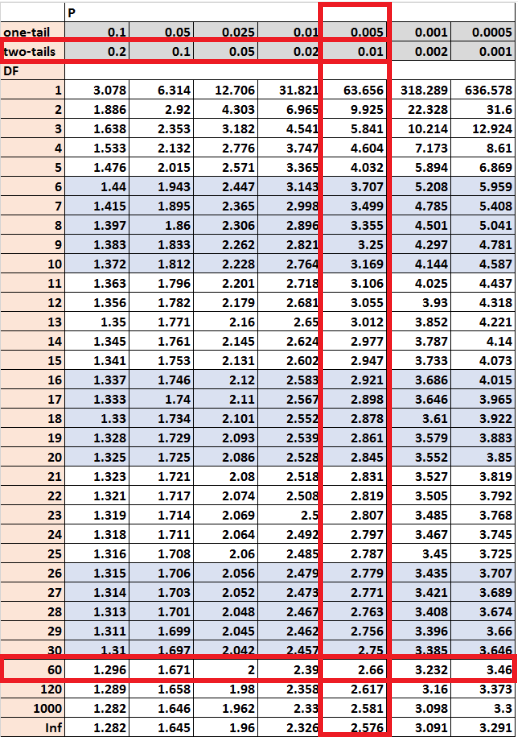

In [81]:
# As an approximation, let's use 2.65 as our critical value.
# Since we perform a two-sided test, we have two critical values.
# Due to the fact that the t-distribution is symmetrical, the same is true for the critical values.
# The second critical value is thus -2.65.
critical_value = 2.65

Let's plot the t-distribution with our test statistic again.

This time, we want to add the critical values in order to determine the critical region.

Notice that the area shaded in blue under the distribution curve covers all values on the x-axis that are more extreme than our critical values. This area is the alpha, and corresponds thus to about 1% of the total area under the curve.

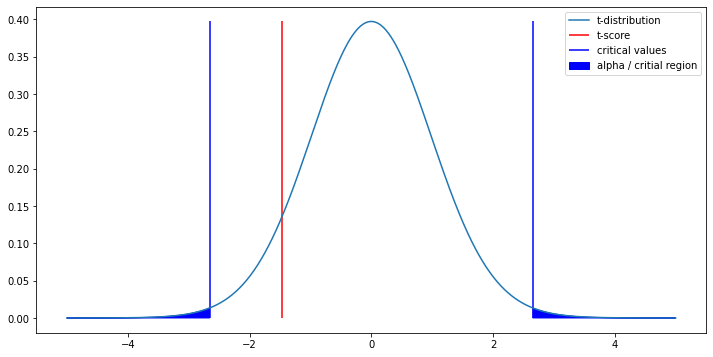

In [82]:
#@title t-distribution, t-score and critical region
plt.figure(figsize=(12,6))
# Plot a t-distribution with the degrees of freedom from our sample.
plt.plot(xt, t.pdf(xt,degrees_of_freedom), label="t-distribution")
# Add a vertical line for the t-score.
plt.vlines(t_score, ymin=0, ymax=max(t.pdf(xt,degrees_of_freedom)), color="red", label="t-score")
# Add vertical lines for the critical values.
plt.vlines(-critical_value, ymin=0, ymax=max(t.pdf(xt,degrees_of_freedom)), color="blue", label="critical values")
plt.vlines(critical_value, ymin=0, ymax=max(t.pdf(xt,degrees_of_freedom)), color="blue")
# Shade the area under the curve for values more extreme than +/-2.65 (= alpha).
plt.fill_between(xt, t.pdf(xt,degrees_of_freedom), where=(-critical_value>xt)|(xt>critical_value), color= "b", label="alpha / critial region")
plt.legend()
plt.show()

## 9.&nbsp; Compare the test statistic with the critical values.

The test statistic is not in the critical region because it is not more extreme as one of the critical values.

For this reason, the null Hypothesis will not be rejected.

We can not assume that the squirrels in our sample are either starving or overweight. On the contrary, it is quite likely that they come from a population with average weight of 1 kg.

# II. The coders approach

The faster way is to use [scipy's function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html) to perform 1-sample t-tests.

To determine whether or not to reject the Null Hypothesis, it is common to compare the alpha to the so-called p-value (instead of comparing the test statistic to the critical region).

> **Note**: Whether you compare alpha to the p-value or the test statistic to the critical values/regions is a matter of personal taste. The result itself will always be the same.

You can see this in the chart below:

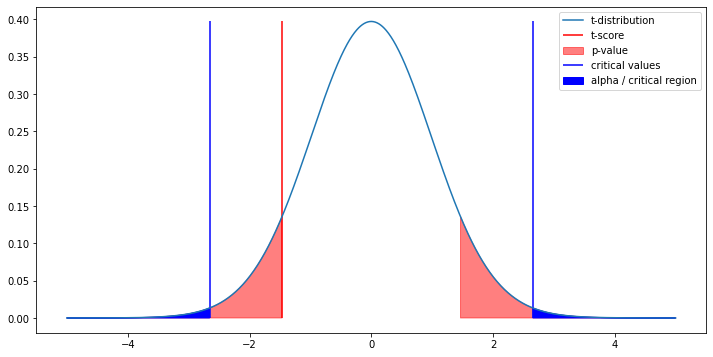

In [83]:
#@title t-distribution, t-score, critical region and alpha
plt.figure(figsize=(12,6))
# Plot a t-distribution with the degrees of freedom from our sample.
plt.plot(xt, t.pdf(xt,degrees_of_freedom), label="t-distribution")
# Add a vertical line for the t-score.
plt.vlines(t_score, ymin=0, ymax=max(t.pdf(xt,degrees_of_freedom)), color="red", label="t-score")
# Shade the region in the tails that is more extreme than the +/-t-score (= p-value).
plt.fill_between(xt, t.pdf(xt,degrees_of_freedom), where=(-abs(t_score)>xt)|(xt>abs(t_score)), color= "r", alpha=0.5, label="p-value")
# Add vertical lines for the critical values.
plt.vlines(-critical_value, ymin=0, ymax=max(t.pdf(xt,degrees_of_freedom)), color="blue", label="critical values")
plt.vlines(critical_value, ymin=0, ymax=max(t.pdf(xt,degrees_of_freedom)), color="blue")
# Shade the area under the curve for values more extreme than +/-2.65 (= alpha).
plt.fill_between(xt, t.pdf(xt,degrees_of_freedom), where=(-critical_value>xt)|(xt>critical_value), color= "b", label="alpha / critical region")
plt.legend()
plt.show()

In [84]:
from scipy.stats import ttest_1samp

In [85]:
tscore, pvalue = ttest_1samp(a = squirrels, popmean= 1, alternative='two-sided')

In [86]:
tscore

-1.459010954883512

In [87]:
pvalue

0.14969253082162412

Check whether the t-score calculated manually and the one calculated using scipy are the same.

In [88]:
tscore == t_score

True

In [89]:
if pvalue > alpha:
  print("The p-value is larger than alpha.")
else:
  print("The p-value is smaller than alpha.")

The p-value is larger than alpha.


Does this mean that we should reject the Null Hypothesis - or not?

Since the p-value is larger than the alpha, we do not reject the Null Hypothesis.

# III. Challenges

## Exercise 1

Our research partner collected sample weights from a neighbouring population of squirrels.

In [90]:
squirrels_2 = pd.Series([0.7 , 1.13, 0.64, 1.02, 1.19, 0.84, 0.67, 1.06, 0.74,
                         0.74, 1.07, 1.08, 1.02, 0.86, 0.76, 1.06, 0.81, 1.23,
                         1.06, 0.82, 1.09, 1.04, 1.06, 0.86, 1.27, 0.82, 0.54,
                         0.68, 1.11, 0.72, 0.73, 0.6 , 0.94, 1.26, 0.94, 1.19,
                         1.03, 1.01, 0.85, 0.59, 0.88, 0.49, 1.06, 0.76, 1.14,
                         0.47, 0.63, 0.92, 0.65, 1.42, 1.12, 1.03, 0.71])

### 1.&nbsp; Define the initial question for which the truth is not known.

In [91]:
# Your code here.
# Can we assume that the average weight of the squirrels in our neighboring population is 1kg?

### 2.&nbsp; State the Null Hypothesis and the Alternative Hypothesis.

In [92]:
# Your code here.
# H0 = Squirrels do have a mean of 1kg
# H1 = Squirrels do not have a mean of 1kg

### 3.&nbsp; Select an appropriate significance level alpha ($\alpha$).

In [93]:
# Your code here.
alpha = 0.05

### 4.&nbsp; Consider the statistical assumptions about the set of data.

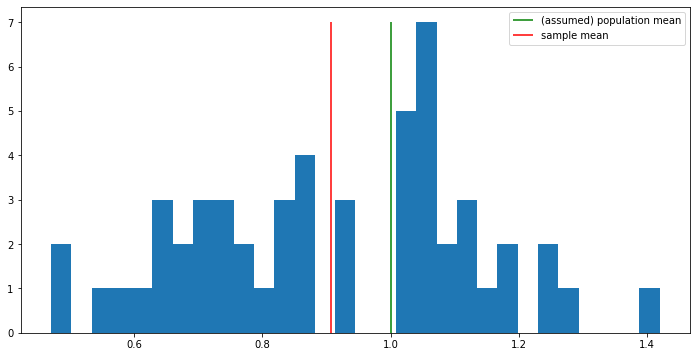

In [94]:
# Your code here.
sample_mean = squirrels_2.mean()

plt.figure(figsize=(12,6))
# Plot a histogram of the squirrels' weights.
yp, xp, _ = plt.hist(squirrels_2, bins=30)
# Add a vertical line for the population mean.
plt.vlines(1, ymin=0, ymax=max(yp), color="green", label="(assumed) population mean")
# Add a vertical line for the sample mean.
plt.vlines(sample_mean, ymin=0, ymax=max(yp), color="red", label="sample mean")
plt.legend()
plt.show()

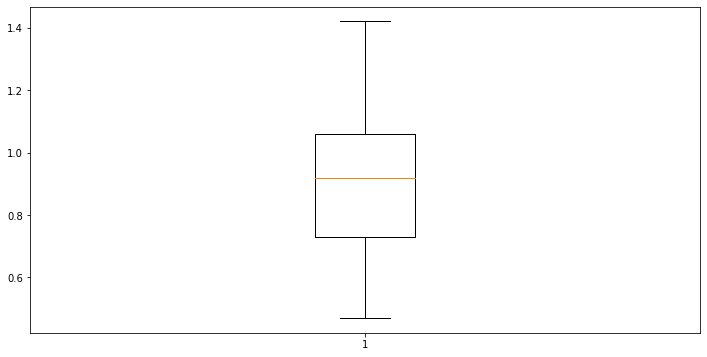

In [95]:
plt.figure(figsize=(12,6))
# Plot a boxplot of the squirrels' weights.
plt.boxplot(squirrels_2);

### 5.&nbsp; Decide on the appropriate test to use and the associated test statistic.

In [96]:
# Your code here.
# 1 sample t test

# Your code here.
#Comparing the mean of a sample with a predefined value is done using a **1-sample t-test**.

#The associated test statistic is the t-score: 
#t = (x_bar – μ) / (s / sqrtn)

#where

#x_bar = sample mean
#μ = predefined value
#s = sample standard deviation
#n = sample size

### 6.&nbsp; Derive the distribution of the test statistic under the Null Hypothesis from the assumptions.

In [97]:
# Your code here.
# The sample size is commonly denoted as n.
n_2 = len(squirrels_2)
n_2

53

In [98]:
# The degrees of freedom can be derived from the sample size.
degrees_of_freedom_2 = n_2 - 1
degrees_of_freedom_2

52

### 7.&nbsp; Compute the test statistic using the data set.

In [99]:
# Your code here.
x_bar_2 = squirrels_2.mean()

mu_2 = 1

s_2 = np.std(squirrels_2, ddof=1)

t_score_2 = (x_bar_2-mu_2)/(s_2/np.sqrt(n_2))

t_score_2

-3.0222502237975024

### 8.&nbsp; Derive the critical region associated with the level of alpha.

In [100]:
# Your code here.
critical_value_2 = 2.68

### 9.&nbsp; Compare the test statstic with the critical values.

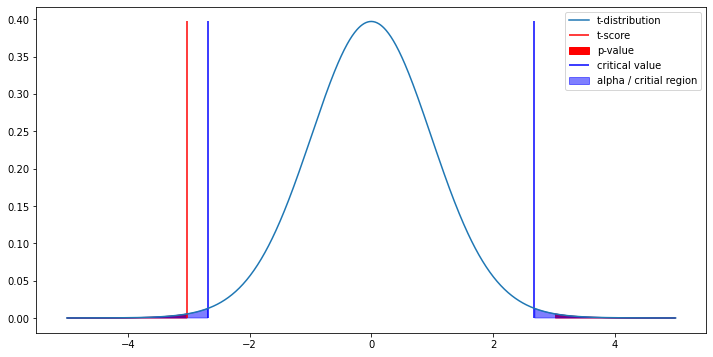

In [101]:
# Your code here.
plt.figure(figsize=(12,6))
# Plot a t-distribution with the degrees of freedom from our sample.
plt.plot(xt, t.pdf(xt,degrees_of_freedom_2), label="t-distribution")
# Add a vertical line for the t-score.
plt.vlines(t_score_2, ymin=0, ymax=max(t.pdf(xt,degrees_of_freedom_2)), color="red", label="t-score")
# Shade the region in the tails that is more extreme than the +/-t-score (= p-value).
plt.fill_between(xt, t.pdf(xt,degrees_of_freedom_2), where=(-abs(t_score_2)>xt)|(xt>abs(t_score_2)), color= "r", label="p-value")
# Add vertical lines for the critical values.
plt.vlines(-2.68, ymin=0, ymax=max(t.pdf(xt,degrees_of_freedom_2)), color="blue", label="critical value")
plt.vlines(2.68, ymin=0, ymax=max(t.pdf(xt,degrees_of_freedom_2)), color="blue")
# Shade the area under the curve for values more extreme than +/-2.65 (= alpha).
plt.fill_between(xt, t.pdf(xt,degrees_of_freedom_2), where=(-2.68>xt)|(xt>2.68), color= "b", alpha=0.5, label="alpha / critial region")
plt.legend()
plt.show()

## Exercise 2

Suspecting that WBSCS are smarter than the general population, you designed an experiment and randomly sampled 45 WBS CODING SCHOOL students, who took an IQ test and their result was 130. The average IQ is 100. Test whether or not WBSCS students are likely to be smarter than the regular population.

In [102]:
wbscs_students = [172, 155, 144, 112, 79, 132, 126, 184, 145, 155, 65, 73, 
 56, 156, 117, 213, 143, 86, 86, 197, 54, 195, 186, 108, 
 76, 191, 54, 115, 106, 173, 91, 95, 144, 94, 135, 116, 
 182, 144, 127, 216, 71, 200, 182, 71, 129]

### 1.&nbsp; Define the Null and the Alternative Hypotheses.

In [109]:
# Your code here.
# H0 = The average WBSCS IQ is 100
# H1 = The average WBSCS IQ > 100

### 2.&nbsp; Select an appropriate significance level alpha ($\alpha$).

In [ ]:
# Your code here.
alpha_3 = 0.01

### 3.&nbsp; Calculate the test statistic and the p-value.

In [105]:
# Kaj

wbscs_tscore, wbscs_pvalue = ttest_1samp(a = wbscs_students, popmean= 100, alternative='greater')

In [106]:
wbscs_tscore

4.299872471973726

In [107]:
wbscs_pvalue

4.669367573395204e-05

### 4.&nbsp; Compare the p-value with alpha.

In [108]:
# Your code here.
if wbscs_pvalue > alpha:
  print(f"pvalue is greater than alpha, accept the H_0 hypothesis. WBSCS students score in an IQ test about the same as the rest of the population")
else:
  print(f"pvalue is smaller than alpha, accept the H_1 hypothesis. WBSCS students score different in an IQ test than the general population.")

pvalue is smaller than alpha, accept the H_1 hypothesis. WBSCS students score different in an IQ test than the general population.
